# Classify Handwritten Digits (MNIST Dataset) Using CNN

#### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('grayscale')

import tensorflow as tf

from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

#### Load the MNIST dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### Review shapes

In [3]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


#### View sample images from dataset

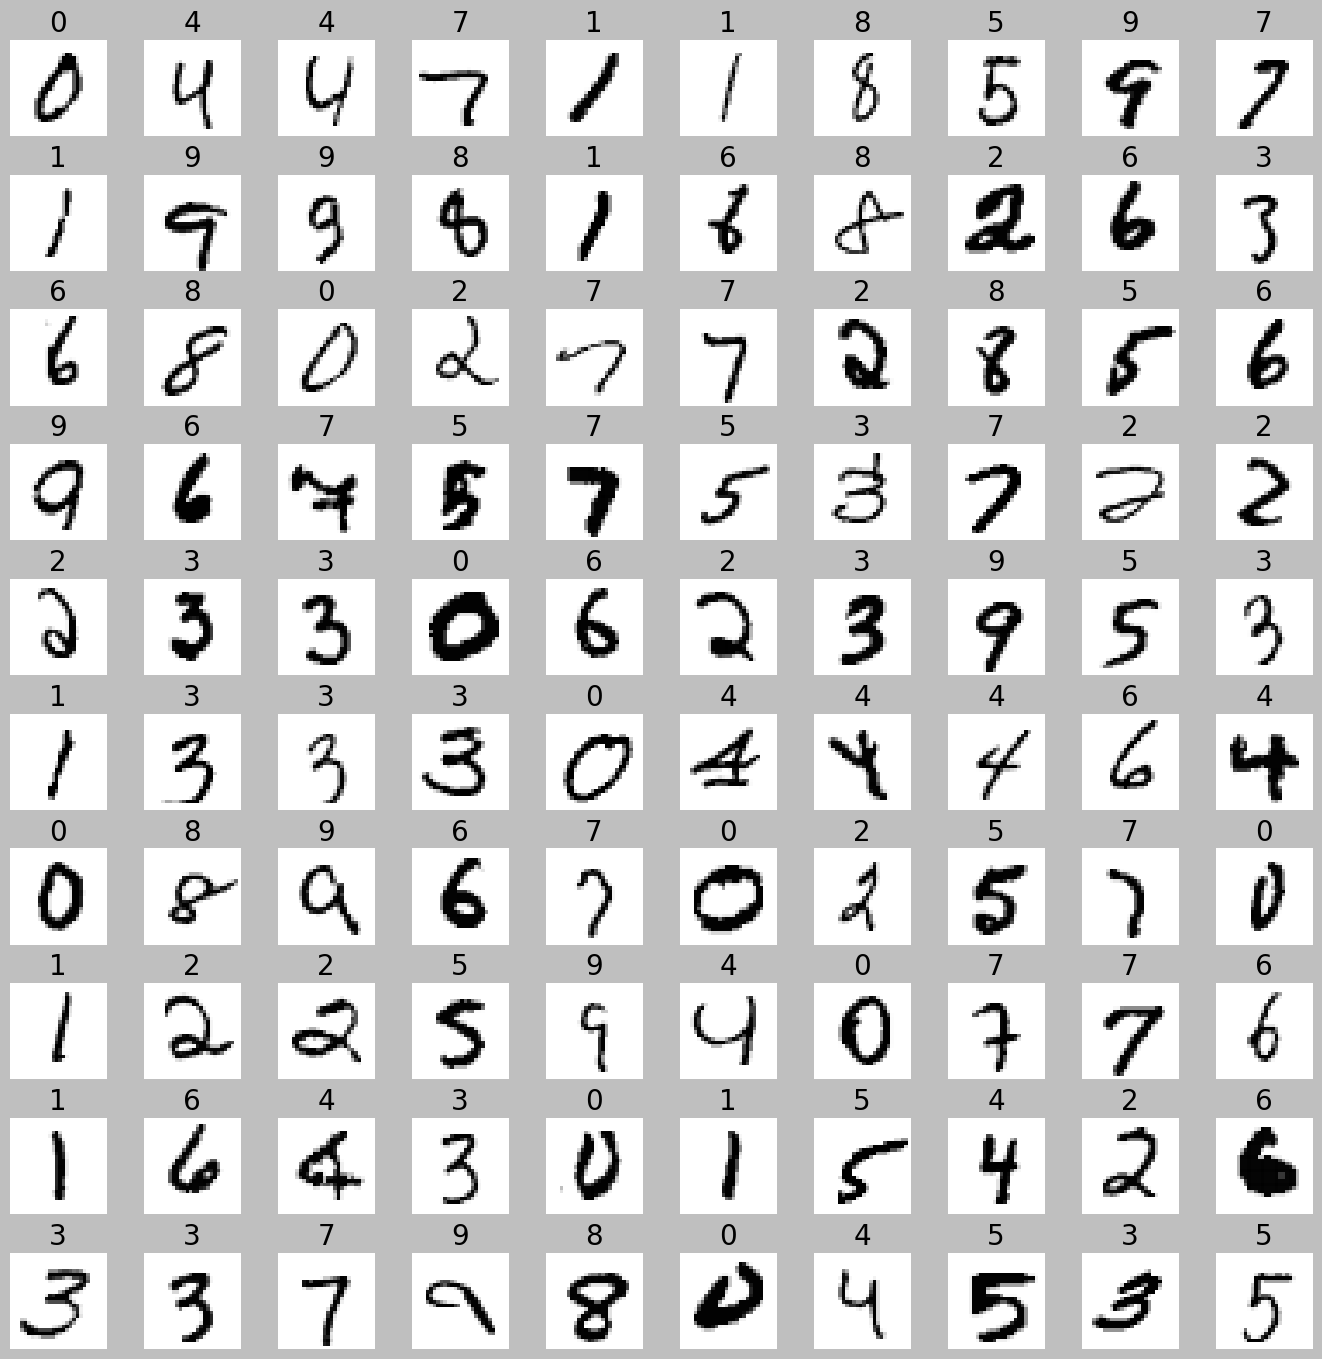

In [4]:
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel()

n_train = len(x_train)

for i in np.arange(0, W_grid * L_grid):

    index = np.random.randint(33, n_train)
    
    axes[i].imshow(x_train[index,0:], cmap='Greys')
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 20)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)
plt.show()

#### View distributions in training and test sets

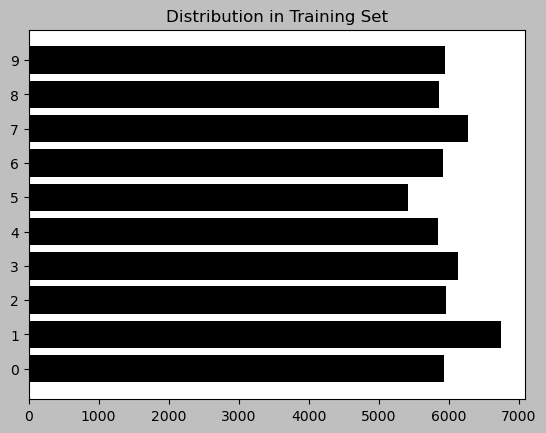

In [5]:
classes_name = labels
classes, counts = np.unique(y_train, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Distribution in Training Set')
plt.show()

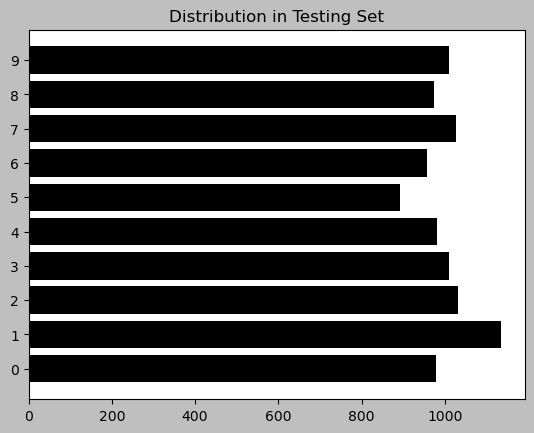

In [6]:
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Distribution in Testing Set')
plt.show()

#### Create the CNN model

In [7]:
model = Sequential()
input_shape = (28, 28, 1)
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [8]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8945 - accuracy: 0.8559
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2870 - accuracy: 0.9232
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2278 - accuracy: 0.9386
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1892 - accuracy: 0.9491
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1790 - accuracy: 0.9521
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1650 - accuracy: 0.9556
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1589 - accuracy: 0.9577
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1480 - accuracy: 0.9609
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1446 - accuracy: 0.9617
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - l

#### Evaluate the model

In [9]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1852 - accuracy: 0.9693


[0.18520580232143402, 0.9692999720573425]

#### Make predictions

1/1 [==============================] - 0s 68ms/step
2


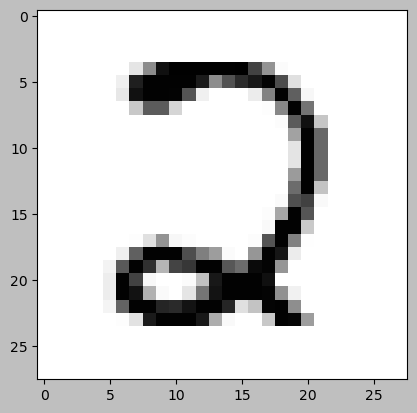

In [10]:
image_index = 72
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

1/1 [==============================] - 0s 15ms/step
4


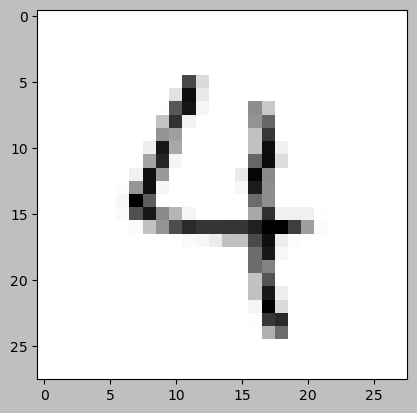

In [11]:
image_index = 24
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

1/1 [==============================] - 0s 14ms/step
6


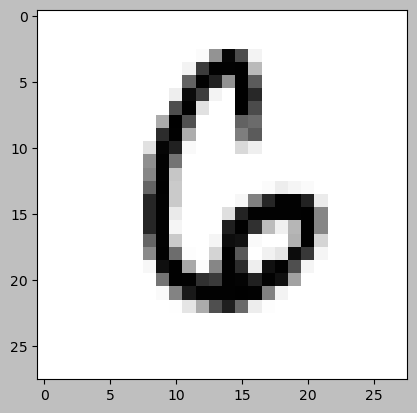

In [12]:
image_index = 989
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())